In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("airbnb_tp.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            2019 non-null   int64  
 1   name                  2019 non-null   object 
 2   price                 2019 non-null   int64  
 3   latitude              2019 non-null   float64
 4   longitude             2019 non-null   float64
 5   accommodates          2019 non-null   float64
 6   bathrooms             1979 non-null   float64
 7   bedrooms              2015 non-null   float64
 8   num_beds              2016 non-null   float64
 9   rating_accuracy       1356 non-null   float64
 10  rating_cleanliness    1356 non-null   float64
 11  rating_communication  1356 non-null   float64
 12  rating_location       1356 non-null   float64
 13  rating_value          1356 non-null   float64
 14  review_score_average  2019 non-null   float64
 15  price_per_person     

In [4]:
df.head()

,listing_id,name,price,latitude,longitude,accommodates,bathrooms,bedrooms,num_beds,rating_accuracy,rating_cleanliness,rating_communication,rating_location,rating_value,review_score_average,price_per_person,amenities_count
0,281552,Harvard Sq Large 1BR overlooks park,175,42.377119,-71.120112,3.0,1.0,1.0,2.0,5.0,4.5,4.5,5.0,5.0,4.8,58.333333,9
1,182613,Luxury 2BR condo Charlestown Boston,249,42.377387,-71.060435,8.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,4.5,4.7,31.125000,11
2,1587540,Cozy House on Bunker Hill in Boston,225,42.378898,-71.061182,4.0,1.5,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,56.250000,8
3,469506,"Luxury 1bd, Safe/Central Brookline",140,42.338848,-71.135475,2.0,1.0,1.0,1.0,5.0,5.0,4.5,4.5,4.5,4.7,70.000000,12
4,3937268,Boston bedroom & private bathroom,99,42.343206,-71.119955,2.0,1.0,1.0,1.0,4.5,5.0,5.0,5.0,5.0,4.9,49.500000,7


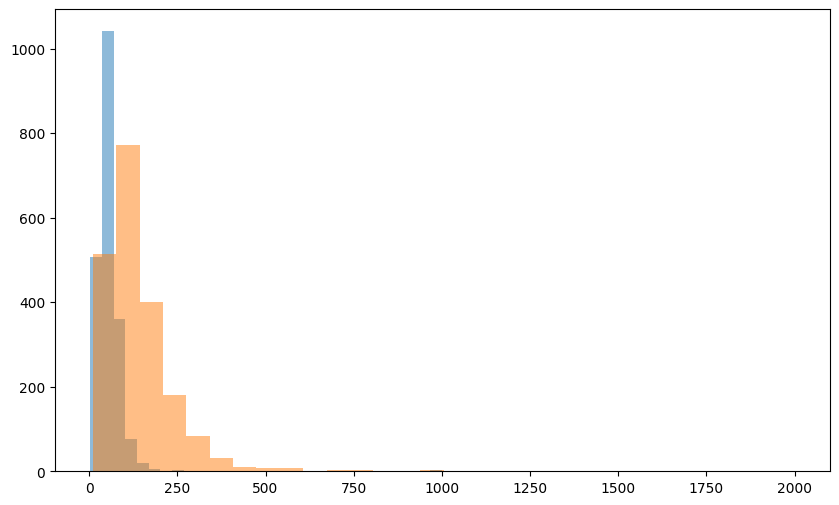

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df["price_per_person"], bins=30, alpha=0.5)
plt.hist(df["price"], bins=30, alpha=0.5)
plt.show()

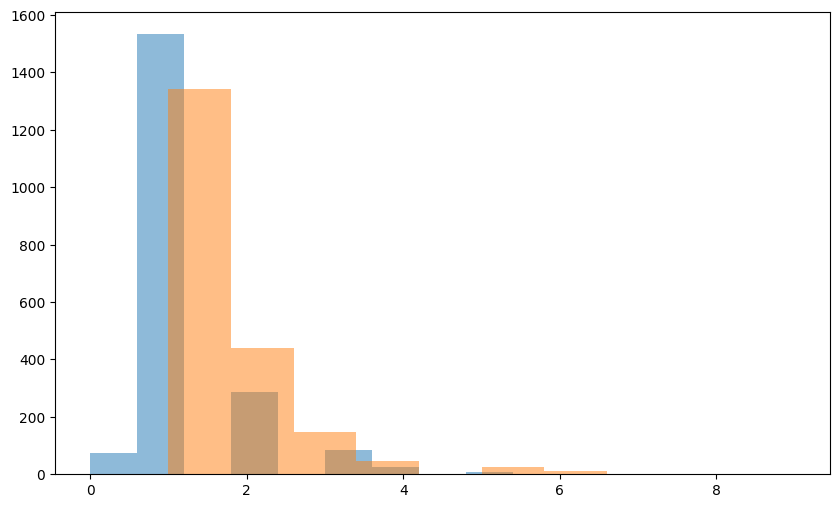

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df["bedrooms"], bins=10, alpha=0.5)
plt.hist(df["num_beds"], bins=10, alpha=0.5)
plt.show()

C:\Users\etien\AppData\Local\Temp\ipykernel_27980\3658595227.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[room_all], labels=room_all)
C:\Users\etien\AppData\Local\Temp\ipykernel_27980\3658595227.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[rating_all], labels=rating_all)


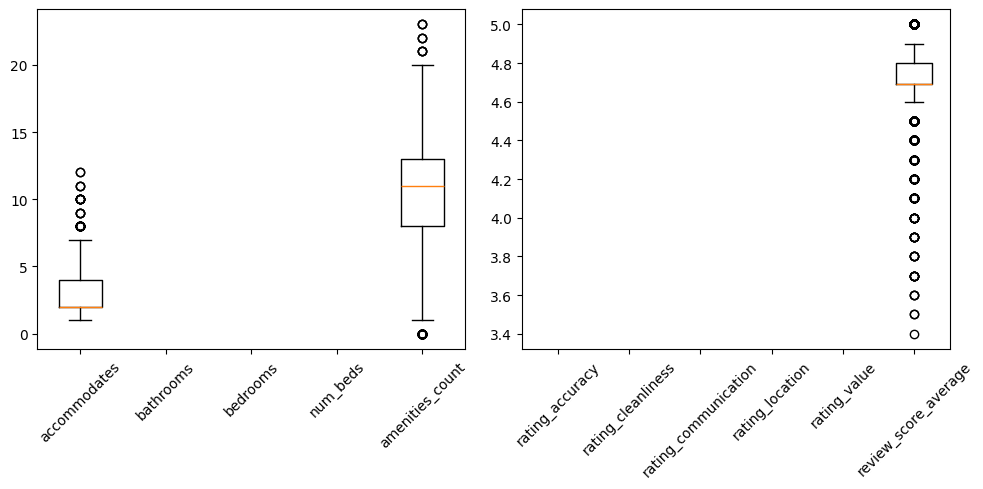

In [7]:
room_all = [
    "accommodates", "bathrooms", "bedrooms", "num_beds",
    "amenities_count"
]
rating_all = [
    "rating_accuracy", "rating_cleanliness", "rating_communication",
    "rating_location", "rating_value", "review_score_average"
]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df[room_all], labels=room_all)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.boxplot(df[rating_all], labels=rating_all)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
df[rating_all].head()

,rating_accuracy,rating_cleanliness,rating_communication,rating_location,rating_value,review_score_average
0,5.0,4.5,4.5,5.0,5.0,4.8
1,5.0,5.0,5.0,4.0,4.5,4.7
2,5.0,5.0,5.0,5.0,5.0,5.0
3,5.0,5.0,4.5,4.5,4.5,4.7
4,4.5,5.0,5.0,5.0,5.0,4.9


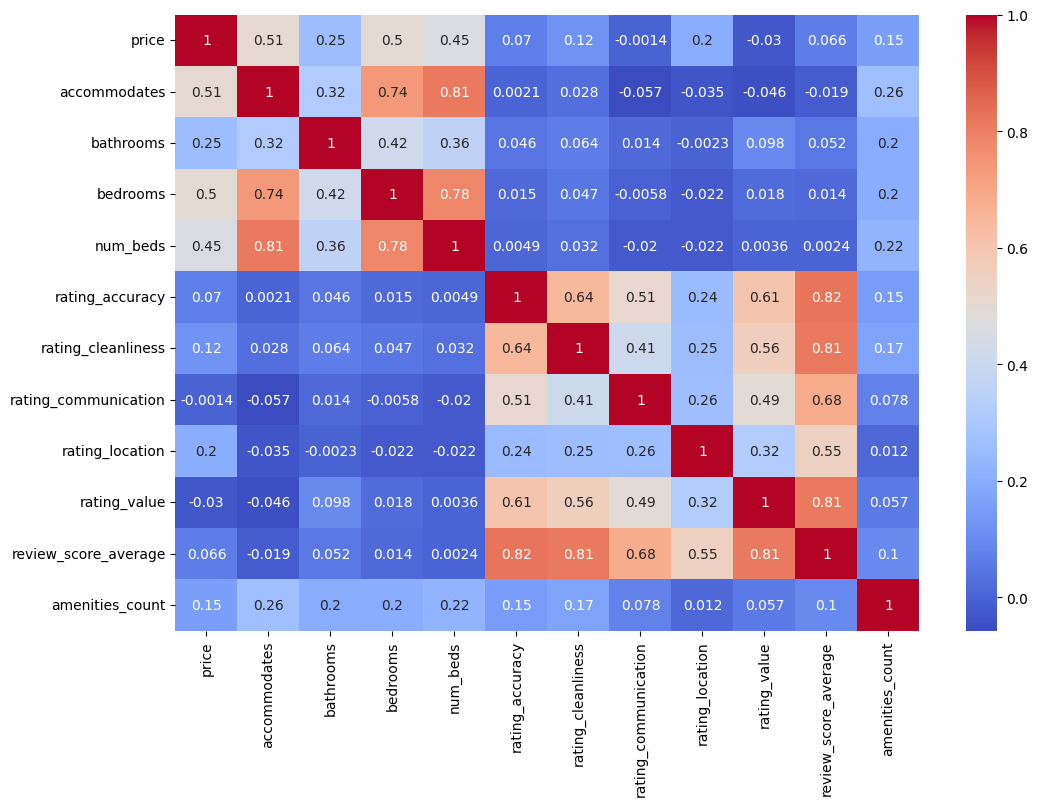

In [9]:
cols = [
    "price", "accommodates", "bathrooms", "bedrooms", "num_beds",
    "rating_accuracy", "rating_cleanliness", "rating_communication",
    "rating_location", "rating_value", "review_score_average",
    "amenities_count"
]

corr = df[cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

La "review_score_average" est trés dépendante de la "rating_cleanliness" et de la "rating_value" (propreté et rapport qualité prix)

La 3ème variable la plus influente est la "rating_communication" (échange avec l'hôte)

Le nombre de "bedrooms" et "num_beds" sont corrélé positivement avec la "accommodates" (le nombre de chamber et lit par rapport à la capacité d'accueil)

In [10]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="my_geo_app")

# Pour éviter d'être bloqué par l'API
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_quartier(lat, lon):
    try:
        location = reverse((lat, lon), language="fr")
        if location and "address" in location.raw:
            address = location.raw["address"]
            # On récupère ce qui ressemble le plus à un quartier
            return (
                address.get("neighbourhood") or
                address.get("suburb") or
                address.get("city_district") or
                address.get("quarter") or
                None
            )
    except:
        return None

In [11]:
df.describe()

,listing_id,price,latitude,longitude,accommodates,bathrooms,bedrooms,num_beds,rating_accuracy,rating_cleanliness,rating_communication,rating_location,rating_value,review_score_average,price_per_person,amenities_count
count,2.019000e+03,2019.000000,2019.000000,2019.000000,2019.000000,1979.000000,2015.000000,2016.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,2019.000000,2019.000000,2019.000000
mean,2.567601e+06,140.734027,42.365811,-71.108438,2.784547,1.188732,1.248139,1.521329,4.733407,4.626106,4.851032,4.679941,4.581858,4.694469,56.001037,10.762259
std,1.446989e+06,111.560621,0.027152,0.036493,1.641158,0.517519,0.693970,0.933810,0.362827,0.442599,0.274243,0.345337,0.367412,0.218460,51.963563,3.826249
min,2.751000e+03,10.000000,42.243495,-71.355964,1.000000,0.000000,0.000000,1.000000,3.000000,2.500000,3.000000,3.500000,3.000000,3.400000,2.500000,0.000000
25%,1.307146e+06,75.000000,42.350188,-71.125436,2.000000,1.000000,1.000000,1.000000,4.500000,4.500000,4.500000,4.500000,4.500000,4.694469,35.250000,8.000000
50%,2.737083e+06,110.000000,42.367841,-71.107905,2.000000,1.000000,1.000000,1.000000,5.000000,4.500000,5.000000,4.500000,4.500000,4.694469,48.000000,11.000000
75%,3.909752e+06,175.000000,42.381364,-71.089378,4.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.800000,65.500000,13.000000
max,4.637854e+06,2000.000000,42.486433,-70.967355,12.000000,6.500000,6.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1000.000000,23.000000


In [12]:
import geopandas as gpd

from shapely.geometry import Point

# --- load datasets ---
 
# 1) Boston neighborhoods

boston_nbhd = gpd.read_file("boston.geojson").to_crs("EPSG:4326")
 
# 2) Massachusetts municipal boundaries

# Replace with actual GeoJSON/shapefile path after download from MassGIS

municipal = gpd.read_file("export-ma_municipalities.geojson").to_crs("EPSG:4326")
 
# 3) Airbnb points

df = pd.read_csv("airbnb_tp.csv")

gdf = gpd.GeoDataFrame(

    df,

    geometry=gpd.points_from_xy(df.longitude, df.latitude),

    crs="EPSG:4326"

)
 
# --- spatial joins ---
 
# Assign Boston neighborhood if inside Boston

gdf_nbhd = gpd.sjoin(

    gdf,

    boston_nbhd,

    how="left",

    predicate="within",

    lsuffix="",

    rsuffix="_nbhd"

)
 
# Assign MA municipality (includes Boston + neighbors)

gdf_muni = gpd.sjoin(

    gdf_nbhd,

    municipal,

    how="left",

    predicate="within",

    lsuffix="",

    rsuffix="_muni"

)
 
# Clean up columns

gdf_final = gdf_muni.rename(columns={

    "NAME": "municipality",     # typical municipal name field

    "neighborhood": "boston_neighborhood"  # if Boston dataset has this

})

gdf_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2019 entries, 0 to 2018
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   listing_id            2019 non-null   int64              
 1   name_                 2019 non-null   object             
 2   price                 2019 non-null   int64              
 3   latitude              2019 non-null   float64            
 4   longitude             2019 non-null   float64            
 5   accommodates          2019 non-null   float64            
 6   bathrooms             1979 non-null   float64            
 7   bedrooms              2015 non-null   float64            
 8   num_beds              2016 non-null   float64            
 9   rating_accuracy       1356 non-null   float64            
 10  rating_cleanliness    1356 non-null   float64            
 11  rating_communication  1356 non-null   float64            
 12  rat

In [13]:
# Identify rows where neighborhood is missing
missing_nbh = gdf_final["name__nbhd"].isna()
# Initialize Quarter_Or_City with neighborhood names
df["Quarter_Or_City"] = gdf_final["name__nbhd"]
# Fill missing values with municipality name
df.loc[missing_nbh, "Quarter_Or_City"] = gdf_final.loc[missing_nbh, "municipal"]
# Display rows with missing neighborhoods for verification
df.loc[missing_nbh].head()

,listing_id,name,price,latitude,longitude,accommodates,bathrooms,bedrooms,num_beds,rating_accuracy,rating_cleanliness,rating_communication,rating_location,rating_value,review_score_average,price_per_person,amenities_count,Quarter_Or_City
0,281552,Harvard Sq Large 1BR overlooks park,175,42.377119,-71.120112,3.0,1.0,1.0,2.0,5.0,4.5,4.5,5.0,5.0,4.8,58.333333,9,Cambridge
3,469506,"Luxury 1bd, Safe/Central Brookline",140,42.338848,-71.135475,2.0,1.0,1.0,1.0,5.0,5.0,4.5,4.5,4.5,4.7,70.000000,12,Brookline
4,3937268,Boston bedroom & private bathroom,99,42.343206,-71.119955,2.0,1.0,1.0,1.0,4.5,5.0,5.0,5.0,5.0,4.9,49.500000,7,Brookline
5,3036349,Top floor getaway,89,42.338526,-71.143516,2.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,44.500000,11,Brookline
6,2664052,Cozy Living Room Accommodations,49,42.331738,-71.119896,2.0,1.0,1.0,1.0,3.5,3.0,4.5,4.5,3.5,3.8,24.500000,10,Brookline


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            2019 non-null   int64  
 1   name                  2019 non-null   object 
 2   price                 2019 non-null   int64  
 3   latitude              2019 non-null   float64
 4   longitude             2019 non-null   float64
 5   accommodates          2019 non-null   float64
 6   bathrooms             1979 non-null   float64
 7   bedrooms              2015 non-null   float64
 8   num_beds              2016 non-null   float64
 9   rating_accuracy       1356 non-null   float64
 10  rating_cleanliness    1356 non-null   float64
 11  rating_communication  1356 non-null   float64
 12  rating_location       1356 non-null   float64
 13  rating_value          1356 non-null   float64
 14  review_score_average  2019 non-null   float64
 15  price_per_person     

In [15]:
df["Quarter_Or_City"] = df["Quarter_Or_City"].fillna("Boston")

df["bathrooms"] = df["bathrooms"].fillna(0)

In [16]:
mask = df["listing_id"] != 4314333

df = df[mask]

In [17]:
df["bedrooms"] = df["bedrooms"].fillna(0)

In [18]:
mask = df["num_beds"].isna()
df = df[mask==False]

In [19]:
df[df["num_beds"].isna()]

,listing_id,name,price,latitude,longitude,accommodates,bathrooms,bedrooms,num_beds,rating_accuracy,rating_cleanliness,rating_communication,rating_location,rating_value,review_score_average,price_per_person,amenities_count,Quarter_Or_City


In [20]:
int_col = ["accommodates", "bathrooms", "bedrooms", "num_beds", "rating_accuracy"]

In [21]:
df[int_col] = df[int_col].fillna(0).astype(int)
df.head()

,listing_id,name,price,latitude,longitude,accommodates,bathrooms,bedrooms,num_beds,rating_accuracy,rating_cleanliness,rating_communication,rating_location,rating_value,review_score_average,price_per_person,amenities_count,Quarter_Or_City
0,281552,Harvard Sq Large 1BR overlooks park,175,42.377119,-71.120112,3,1,1,2,5,4.5,4.5,5.0,5.0,4.8,58.333333,9,Cambridge
1,182613,Luxury 2BR condo Charlestown Boston,249,42.377387,-71.060435,8,1,2,3,5,5.0,5.0,4.0,4.5,4.7,31.125000,11,Charlestown
2,1587540,Cozy House on Bunker Hill in Boston,225,42.378898,-71.061182,4,1,3,3,5,5.0,5.0,5.0,5.0,5.0,56.250000,8,Charlestown
3,469506,"Luxury 1bd, Safe/Central Brookline",140,42.338848,-71.135475,2,1,1,1,5,5.0,4.5,4.5,4.5,4.7,70.000000,12,Brookline
4,3937268,Boston bedroom & private bathroom,99,42.343206,-71.119955,2,1,1,1,4,5.0,5.0,5.0,5.0,4.9,49.500000,7,Brookline


# Objectif : augmenter le taux d’occupation des logements 2–4 personnes

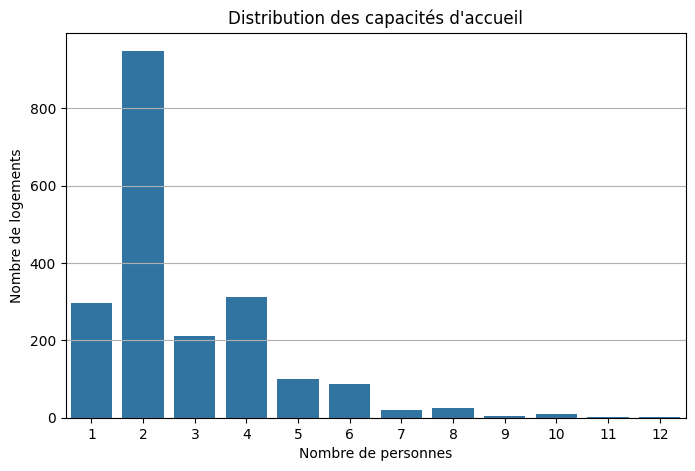

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["accommodates"])
plt.title("Distribution des capacités d'accueil")
plt.xlabel("Nombre de personnes")
plt.ylabel("Nombre de logements")
plt.grid(axis="y")
plt.show()

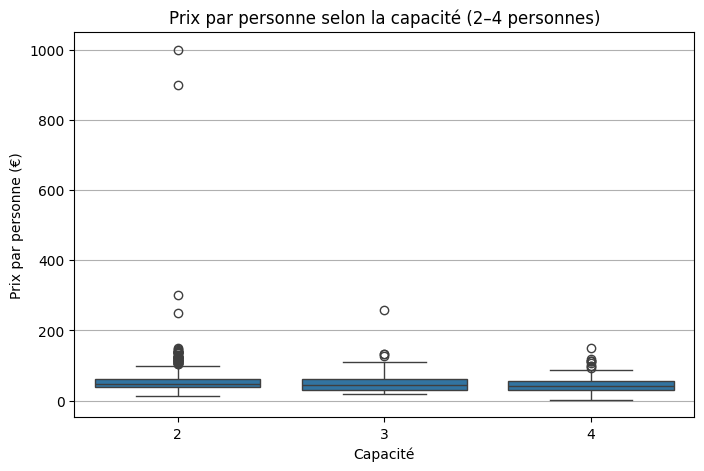

In [23]:
subset = df[df["accommodates"].between(2,4)]

plt.figure(figsize=(8,5))
sns.boxplot(x=subset["accommodates"], y=subset["price_per_person"])
plt.title("Prix par personne selon la capacité (2–4 personnes)")
plt.xlabel("Capacité")
plt.ylabel("Prix par personne (€)")
plt.grid(axis="y")
plt.show()

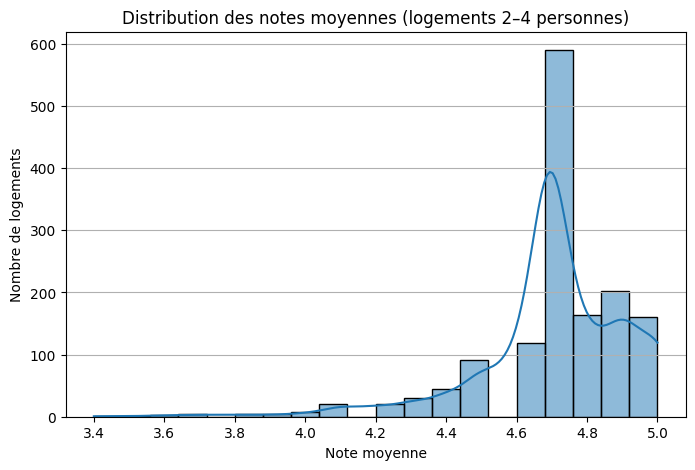

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(subset["review_score_average"], bins=20, kde=True)
plt.title("Distribution des notes moyennes (logements 2–4 personnes)")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de logements")
plt.grid(axis="y")
plt.show()

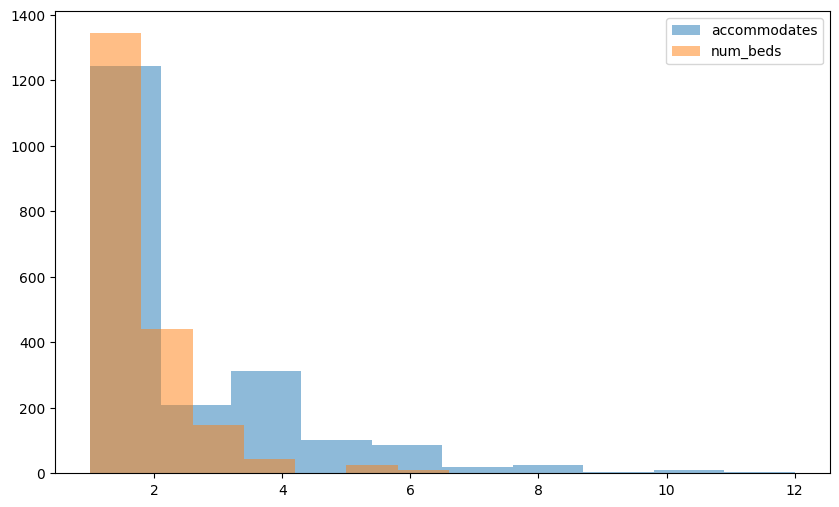

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df["accommodates"], bins=10, alpha=0.5)
plt.hist(df["num_beds"], bins=10, alpha=0.5)
plt.legend(["accommodates", "num_beds"])
plt.show()

# Objectif : augmenter le prix médian par personne de 5 % tout en gardant une note ≥ 4.7

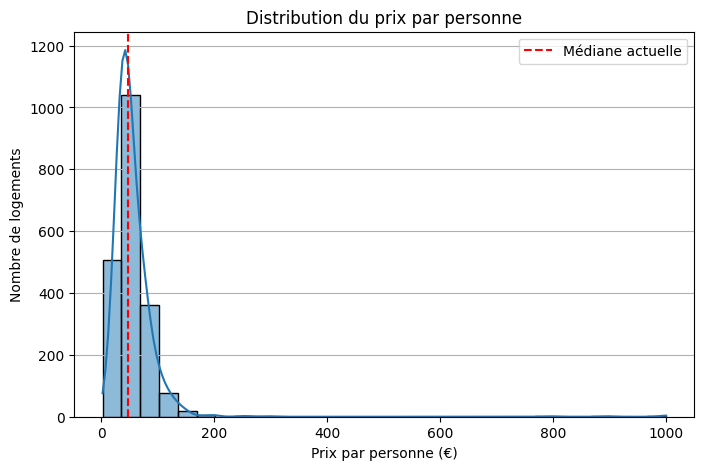

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df["price_per_person"], bins=30, kde=True)
plt.axvline(df["price_per_person"].median(), color="red", linestyle="--", label="Médiane actuelle")
plt.title("Distribution du prix par personne")
plt.xlabel("Prix par personne (€)")
plt.ylabel("Nombre de logements")
plt.legend()
plt.grid(axis="y")
plt.show()

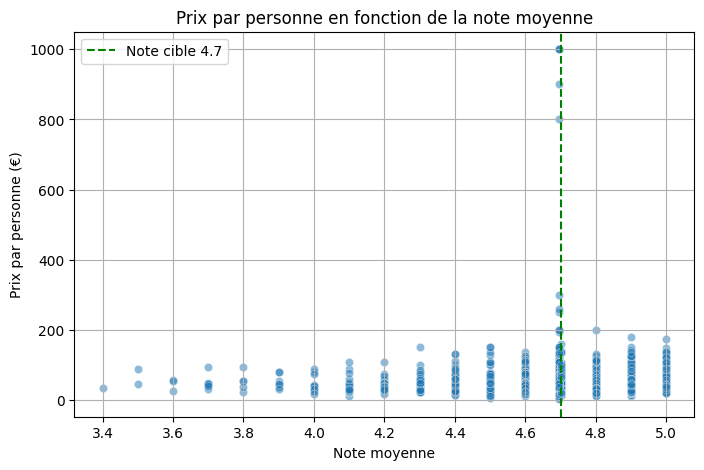

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["review_score_average"], y=df["price_per_person"], alpha=0.5)
plt.axvline(4.7, color="green", linestyle="--", label="Note cible 4.7")
plt.title("Prix par personne en fonction de la note moyenne")
plt.xlabel("Note moyenne")
plt.ylabel("Prix par personne (€)")
plt.legend()
plt.grid(True)
plt.show()

# Objectif : réduire la proportion de logements avec < 20 équipements

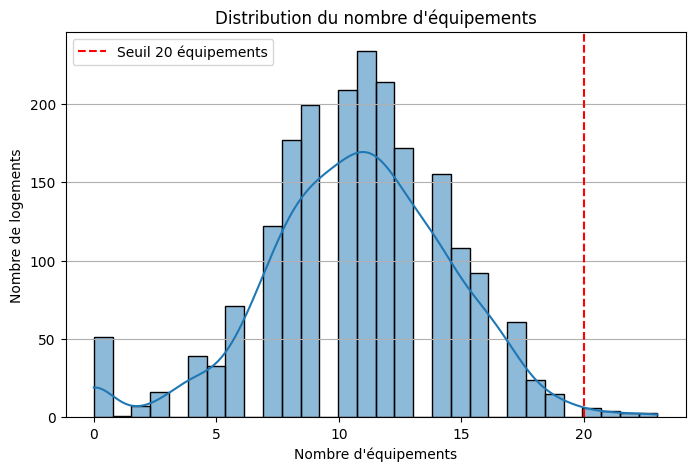

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df["amenities_count"], bins=30, kde=True)
plt.axvline(20, color="red", linestyle="--", label="Seuil 20 équipements")
plt.title("Distribution du nombre d'équipements")
plt.xlabel("Nombre d'équipements")
plt.ylabel("Nombre de logements")
plt.legend()
plt.grid(axis="y")
plt.show()

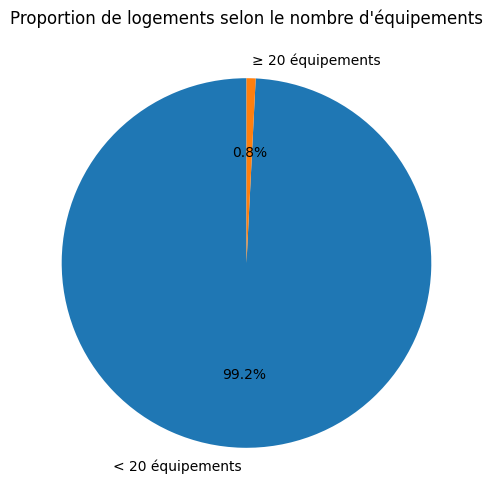

In [29]:
plt.figure(figsize=(6,6))
labels = ["< 20 équipements", "≥ 20 équipements"]
sizes = [
    (df["amenities_count"] < 20).mean(),
    (df["amenities_count"] >= 20).mean()
]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Proportion de logements selon le nombre d'équipements")
plt.show()